<a href="https://colab.research.google.com/github/won195/TIL/blob/master/%5B%ED%86%B5%EA%B3%84%EC%B2%ADX%EC%98%A4%EB%8A%98%EC%BD%94%EB%93%9C%5D_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%ED%99%9C%EC%9A%A9_%EA%B0%95%EC%A2%8C_%E2%91%A3_%EB%A7%88%EC%9D%B4%ED%81%AC%EB%A1%9C%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%86%B5%ED%95%A9%EC%84%9C%EB%B9%84%EC%8A%A4(MDIS)_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%A1%9C%EB%93%9C%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [58]:
%matplotlib inline

import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정

Selecting previously unselected package fonts-nanum.
(Reading database ... 120874 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [1]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = "NanumBarunGothic"
    return font_family

In [19]:
# DataFrame의 각 컬럼을 반복하며
for col in df_mdis.columns:
    # 컬럼의 데이터 타입이 int64인 경우
    if df_mdis[col].dtype == np.int64:
        # 컬럼의 최대값을 확인하고, 해당 범위에 맞는 최소한의 데이터 타입으로 변경
        max_val = df_mdis[col].max()
        if max_val <= np.iinfo(np.int8).max:
            df_mdis[col] = df_mdis[col].astype(np.int8)
        elif max_val <= np.iinfo(np.int16).max:
            df_mdis[col] = df_mdis[col].astype(np.int16)
        elif max_val <= np.iinfo(np.int32).max:
            df_mdis[col] = df_mdis[col].astype(np.int32)


In [18]:
# DataFrame의 각 컬럼을 반복하며
for col in df_mdis.columns:
    # 컬럼의 데이터 타입이 정수인 경우에만
    if df_mdis[col].dtype in [np.int8, np.int16, np.int32, np.int64]:
        # 컬럼의 데이터 중에서 음수가 있는지 확인
        if (df_mdis[col] < 0).any():
            print(f'컬럼 "{col}"에는 음수가 있습니다.')
        else:
            print(f'컬럼 "{col}"에는 음수가 없습니다.')


컬럼 "비경제활동구직의사여부"에는 음수가 없습니다.
컬럼 "비경제활동취업가능성유무"에는 음수가 없습니다.
컬럼 "기타활동사항_4주내비구직사유코드"에는 음수가 없습니다.
컬럼 "기타활동사항_지난1년내구직활동유무"에는 음수가 없습니다.
컬럼 "조사연월"에는 음수가 없습니다.
컬럼 "가중값"에는 음수가 없습니다.
컬럼 "경제활동상태코드"에는 음수가 없습니다.


In [8]:
df_mdis = pd.read_csv("/content/drive/MyDrive/오늘코드todaycode/data/2023_경제활동인구조사 연간자료2 (2000~)_20231026_02993.csv", encoding="cp949")
df_mdis.shape

(58134, 8)

In [9]:
df_mdis.head()

,비경제활동구직의사여부,비경제활동취업가능성유무,기타활동사항_4주내비구직사유코드,기타활동사항_지난1년내구직활동유무,조사연월,연령5세단위코드,가중값,경제활동상태코드
0,0,0,0,0,202308,1,135192,1
1,0,0,0,0,202308,1,208220,1
2,0,0,0,0,202308,1,208220,1
3,0,0,0,0,202308,1,208220,1
4,0,0,0,0,202308,1,227591,1


In [10]:
df_mdis.tail()

,비경제활동구직의사여부,비경제활동취업가능성유무,기타활동사항_4주내비구직사유코드,기타활동사항_지난1년내구직활동유무,조사연월,연령5세단위코드,가중값,경제활동상태코드
58129,2,0,0,0,202308,12,1487838,3
58130,2,0,0,0,202308,12,1487838,3
58131,2,0,0,0,202308,12,1487838,3
58132,2,0,0,0,202308,12,1487838,3
58133,2,0,0,0,202308,12,1487838,3


In [14]:
age_code = {'연령5세단위코드': {1:'15-19세',2:'20-24세',3:'25-29세',4:'30-34세',5:'35-39세',6:'40-44세',7:'45-49세',8:'50-54세',9:'55-59세',10:'60-64세',11:'65~69세',12:'70세이상'}}

In [15]:
df_mdis = df_mdis.replace(age_code)

In [20]:
df_mdis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58134 entries, 0 to 58133
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   비경제활동구직의사여부         58134 non-null  int8  
 1   비경제활동취업가능성유무        58134 non-null  int8  
 2   기타활동사항_4주내비구직사유코드   58134 non-null  int8  
 3   기타활동사항_지난1년내구직활동유무  58134 non-null  int8  
 4   조사연월                58134 non-null  int32 
 5   연령5세단위코드            58134 non-null  object
 6   가중값                 58134 non-null  int32 
 7   경제활동상태코드            58134 non-null  int8  
dtypes: int32(2), int8(5), object(1)
memory usage: 1.2+ MB


In [24]:
df_mdis["구직단념자수"] = df_mdis["가중값"] / 1000
df_mdis

,비경제활동구직의사여부,비경제활동취업가능성유무,기타활동사항_4주내비구직사유코드,기타활동사항_지난1년내구직활동유무,조사연월,연령5세단위코드,가중값,경제활동상태코드,구직단념자수
0,0,0,0,0,202308,15-19세,135192,1,135.192
1,0,0,0,0,202308,15-19세,208220,1,208.220
2,0,0,0,0,202308,15-19세,208220,1,208.220
3,0,0,0,0,202308,15-19세,208220,1,208.220
4,0,0,0,0,202308,15-19세,227591,1,227.591
...,...,...,...,...,...,...,...,...,...
58129,2,0,0,0,202308,70세이상,1487838,3,1487.838
58130,2,0,0,0,202308,70세이상,1487838,3,1487.838
58131,2,0,0,0,202308,70세이상,1487838,3,1487.838
58132,2,0,0,0,202308,70세이상,1487838,3,1487.838


In [37]:
df_mdis = df_mdis[(df_mdis['비경제활동구직의사여부'] == 1) &
                    (df_mdis['비경제활동취업가능성유무'] == 1) &
                    (df_mdis['기타활동사항_4주내비구직사유코드'].isin([1,2,3,4,5,6])) &
                    (df_mdis['기타활동사항_지난1년내구직활동유무'] == 1)]
df_mdis

,비경제활동구직의사여부,비경제활동취업가능성유무,기타활동사항_4주내비구직사유코드,기타활동사항_지난1년내구직활동유무,조사연월,연령5세단위코드,가중값,경제활동상태코드,구직단념자수
36578,1,1,1,1,202308,15-19세,405850,3,405.850
36579,1,1,1,1,202308,20-24세,412870,3,412.870
36580,1,1,1,1,202308,20-24세,598909,3,598.909
36581,1,1,1,1,202308,20-24세,772960,3,772.960
36582,1,1,1,1,202308,20-24세,853478,3,853.478
...,...,...,...,...,...,...,...,...,...
37653,1,1,6,1,202308,70세이상,1214126,3,1214.126
37654,1,1,6,1,202308,70세이상,1214126,3,1214.126
37655,1,1,6,1,202308,70세이상,1313721,3,1313.721
37656,1,1,6,1,202308,70세이상,1487838,3,1487.838


In [41]:
df_mdis.reset_index(drop=True, inplace=True)
df_mdis

,비경제활동구직의사여부,비경제활동취업가능성유무,기타활동사항_4주내비구직사유코드,기타활동사항_지난1년내구직활동유무,조사연월,연령5세단위코드,가중값,경제활동상태코드,구직단념자수
0,1,1,1,1,202308,15-19세,405850,3,405.850
1,1,1,1,1,202308,20-24세,412870,3,412.870
2,1,1,1,1,202308,20-24세,598909,3,598.909
3,1,1,1,1,202308,20-24세,772960,3,772.960
4,1,1,1,1,202308,20-24세,853478,3,853.478
...,...,...,...,...,...,...,...,...,...
459,1,1,6,1,202308,70세이상,1214126,3,1214.126
460,1,1,6,1,202308,70세이상,1214126,3,1214.126
461,1,1,6,1,202308,70세이상,1313721,3,1313.721
462,1,1,6,1,202308,70세이상,1487838,3,1487.838


In [42]:
df_age = df_mdis.groupby("연령5세단위코드")["구직단념자수"].sum()
df_age

연령5세단위코드
15-19세     2845.619
20-24세    36029.617
25-29세    90713.396
30-34세    52451.997
35-39세    23474.987
40-44세    20420.692
45-49세    24378.875
50-54세    24580.504
55-59세    34548.310
60-64세    35050.500
65~69세    25911.960
70세이상     35278.933
Name: 구직단념자수, dtype: float64

In [43]:
df = df_age.reset_index()
df

,연령5세단위코드,구직단념자수
0,15-19세,2845.619
1,20-24세,36029.617
2,25-29세,90713.396
3,30-34세,52451.997
4,35-39세,23474.987
5,40-44세,20420.692
6,45-49세,24378.875
7,50-54세,24580.504
8,55-59세,34548.310
9,60-64세,35050.500


In [45]:
df['연령대'] = df['연령5세단위코드'].str[0] + '0대'

In [50]:
df_age_sum = df.groupby(by=['연령대'])[['구직단념자수']].sum()
df_age_sum

,구직단념자수
연령대,
10대,2845.619
20대,126743.013
30대,75926.984
40대,44799.567
50대,59128.814
60대,60962.460
70대,35278.933


In [53]:
df_age_sum["구직단념자수"] = df_age_sum["구직단념자수"].round(-3)
df_age_sum

,구직단념자수
연령대,
10대,3000.0
20대,127000.0
30대,76000.0
40대,45000.0
50대,59000.0
60대,61000.0
70대,35000.0


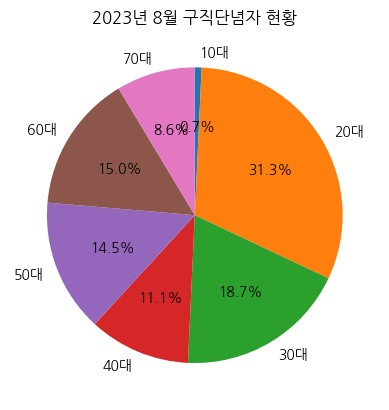

In [65]:
plt.pie(df_age_sum["구직단념자수"], labels=df_age_sum.index,
        startangle=90, counterclock=False, autopct="%.1f%%")
plt.title("2023년 8월 구직단념자 현황")
plt.show()

In [66]:
import plotly.express as px

In [79]:
fig = px.pie(df_age_sum, names=df_age_sum.index,
             values=df_age_sum["구직단념자수"],
             title="2023년 8월 연령별 구직단념자 현황",
             color_discrete_sequence=px.colors.sequential.Pinkyl)
fig.update_traces(textinfo="value+percent+label", direction="clockwise", sort=False)
fig.show()